<a href="https://colab.research.google.com/github/shorya-ag/EDA/blob/main/EDA_BikeLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **EDA for BIKE LANES**

importing all the libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importing the data 

In [4]:
bl = pd.read_csv("/content/Bike_Lanes.csv")
bl.head()

,subType,name,block,type,numLanes,project,route,length,dateInstalled
0,,,,BIKE BOULEVARD,1,GUILFORD AVE BIKE BLVD,,435.737877,0
1,,,,SIDEPATH,1,,NORTHERN,1024.674625,2010
2,,,,SIGNED ROUTE,1,SOUTHEAST BIKE NETWORK,,3749.322638,2010
3,,HUNTINGDON PATH,,SIDEPATH,1,,,0.000000,0
4,STCLN,EDMONDSON AVE,5300 BLK EDMONDSON AVE,BIKE LANE,1,OPERATION ORANGE CONE,,180.925465,2011


checking types of data

In [5]:
bl.dtypes

subType           object
name              object
block             object
type              object
numLanes           int64
project           object
route             object
length           float64
dateInstalled      int64
dtype: object

dropping of columns 

In [39]:
bl['project']


0       GUILFORD AVE BIKE BLVD
1                             
2       SOUTHEAST BIKE NETWORK
3                             
4        OPERATION ORANGE CONE
                 ...          
1626       COLLEGETOWN NETWORK
1627               COLLEGETOWN
1628               COLLEGETOWN
1629               COLLEGETOWN
1630               COLLEGETOWN
Name: project, Length: 1631, dtype: object

renaming of columns:

1. dateInstalled to date 

2. numLanes to lanes



In [40]:
bl = bl.rename(columns = {"dateInstalled" : "date","numLanes" : "lanes"})
bl

,name,block,type,lanes,project,route,length,date
0,,,BIKE BOULEVARD,1,GUILFORD AVE BIKE BLVD,,435.737877,0
1,,,SIDEPATH,1,,NORTHERN,1024.674625,2010
2,,,SIGNED ROUTE,1,SOUTHEAST BIKE NETWORK,,3749.322638,2010
3,HUNTINGDON PATH,,SIDEPATH,1,,,0.000000,0
4,EDMONDSON AVE,5300 BLK EDMONDSON AVE,BIKE LANE,1,OPERATION ORANGE CONE,,180.925465,2011
...,...,...,...,...,...,...,...,...
1626,WYMAN PARK DR,3100 BLK WYMAN PARK DR,SIGNED ROUTE,2,COLLEGETOWN NETWORK,,350.853741,2007
1627,WYMAN PARK DR,700 BLK WYMAN PARK DR,SHARROW,2,COLLEGETOWN,,284.616617,2007
1628,WYMAN PARK DR,800 BLK WYMAN PARK DR,SHARROW,2,COLLEGETOWN,,394.118849,2007
1629,WYMAN PARK DR,900 BLK WYMAN PARK DR,SHARROW,2,COLLEGETOWN,,281.962303,2007


Now let's delete the duplicate rows 

In [9]:
bl.shape

(1631, 9)

In [10]:
bl_duplicates = bl[bl.duplicated()]
print("Number of duplicated rows are",bl_duplicates)

Number of duplicated rows are Empty DataFrame
Columns: [subType, name, block, type, lanes, project, route, length, date]
Index: []


In [12]:
bl.count()

subType    1631
name       1631
block      1631
type       1631
lanes      1631
project    1631
route      1631
length     1631
date       1631
dtype: int64

We found that in our dataset there are no duplicate rows present. So now let's move on to dropping of missing or null values

In [15]:
print(bl.isnull().sum())

subType    0
name       0
block      0
type       0
lanes      0
project    0
route      0
length     0
date       0
dtype: int64


In [19]:
bl.describe()

,lanes,length,date
count,1631.00000,1631.000000,1631.000000
mean,1.42244,269.434449,1853.945432
std,0.51952,277.706646,536.597828
min,0.00000,0.000000,0.000000
25%,1.00000,124.040717,2007.000000
50%,1.00000,200.302684,2010.000000
75%,2.00000,341.022381,2010.000000
max,2.00000,3749.322638,2013.000000


# Detecting the **Outliners**
for lanes,length and date





<Axes: xlabel='lanes'>

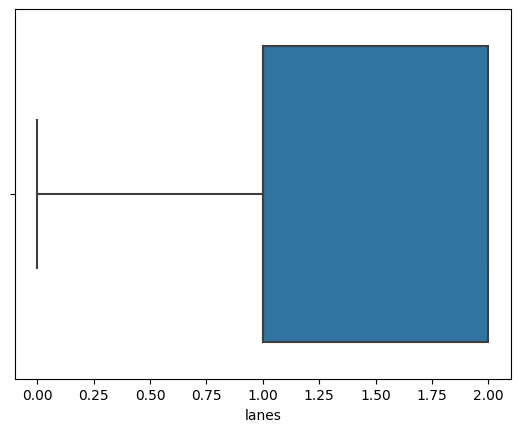

In [41]:
sns.boxplot(x=bl['lanes'])

<Axes: xlabel='length'>

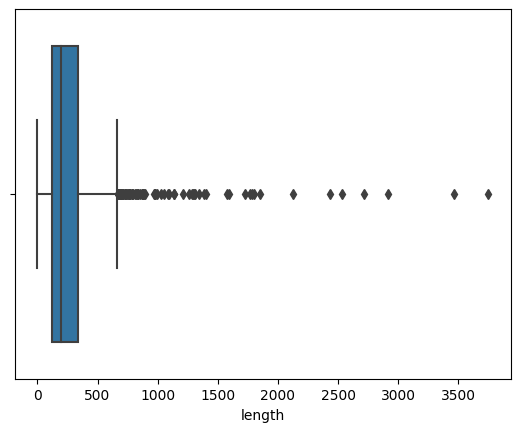

In [43]:
sns.boxplot(x = bl['length'])

<Axes: xlabel='date'>

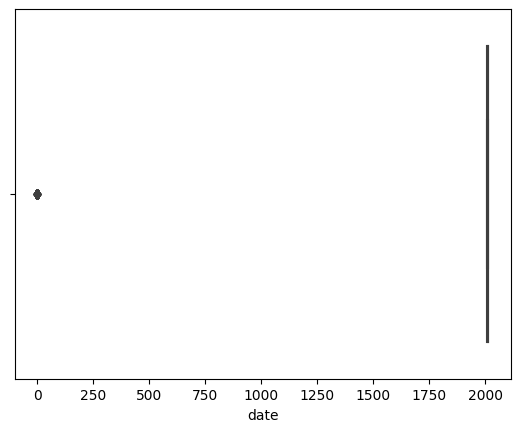

In [44]:
sns.boxplot(x = bl['date'])

We can see that there are more number of outliners in graph of length and also we can also see from the describe that the max_length is far more greater than the mean_length

Now let's remove the outlines in length

In [45]:
# Position of the Outlier
print(np.where(bl['length']>500))


(array([   1,    2,    8,   14,   16,   48,   51,   52,  112,  151,  167,
        174,  177,  184,  196,  206,  208,  209,  211,  215,  216,  217,
        222,  223,  224,  226,  227,  228,  230,  242,  243,  250,  259,
        260,  264,  290,  291,  298,  354,  355,  356,  409,  413,  416,
        431,  448,  449,  450,  454,  455,  472,  473,  480,  481,  496,
        497,  498,  501,  565,  582,  584,  602,  615,  616,  633,  645,
        647,  660,  661,  687,  734,  746,  747,  751,  757,  759,  765,
        767,  776,  777,  782,  783,  853,  854,  855,  867,  868,  871,
        873,  885,  893,  897,  902,  903,  933,  934,  951,  956,  957,
        959,  960,  966,  967,  968, 1010, 1028, 1072, 1075, 1076, 1088,
       1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1105, 1106, 1107,
       1123, 1124, 1130, 1160, 1161, 1167, 1170, 1171, 1172, 1173, 1176,
       1177, 1195, 1196, 1227, 1228, 1283, 1286, 1287, 1304, 1310, 1342,
       1343, 1347, 1380, 1384, 1394, 1444, 1520, 1

In [46]:
# IQR(Inter Quatile Range)
Q1 = np.percentile(bl['length'], 25, method='midpoint')
Q3 = np.percentile(bl['length'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


216.98166358999998


In [59]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(bl['length']>=upper)[0]


#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(bl['length']<=lower)[0]



In [65]:
bl.drop(index = upper_array,inplace = True)
bl.drop(index = lower_array,inplace = True)
print(bl.shape)


(1552, 8)


<Axes: xlabel='length'>

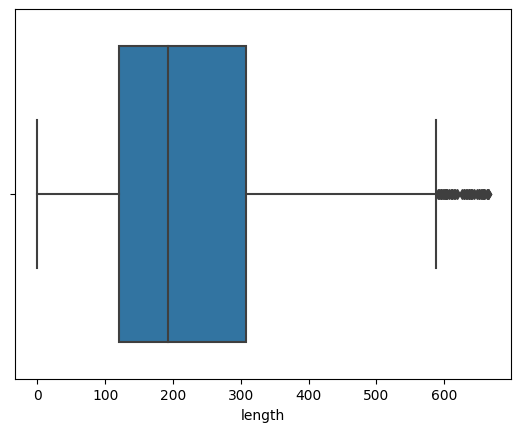

In [66]:
sns.boxplot(x = bl['length'])

Plot different features against one other

Text(0, 0.5, 'Numbers')

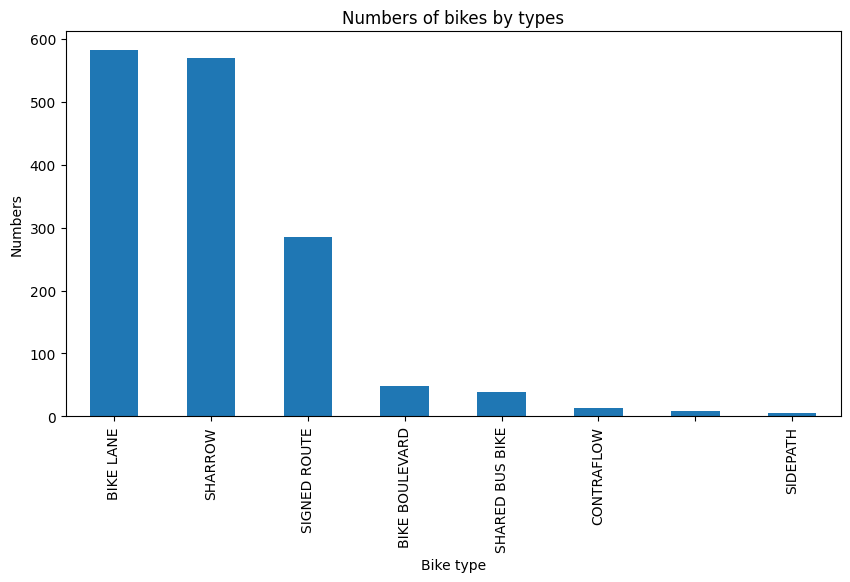

In [72]:
bl.type.value_counts().plot(kind = 'bar',figsize = (10,5))
plt.title("Numbers of bikes by types")
plt.xlabel("Bike type")
plt.ylabel("Numbers")

<Axes: xlabel='length', ylabel='Count'>

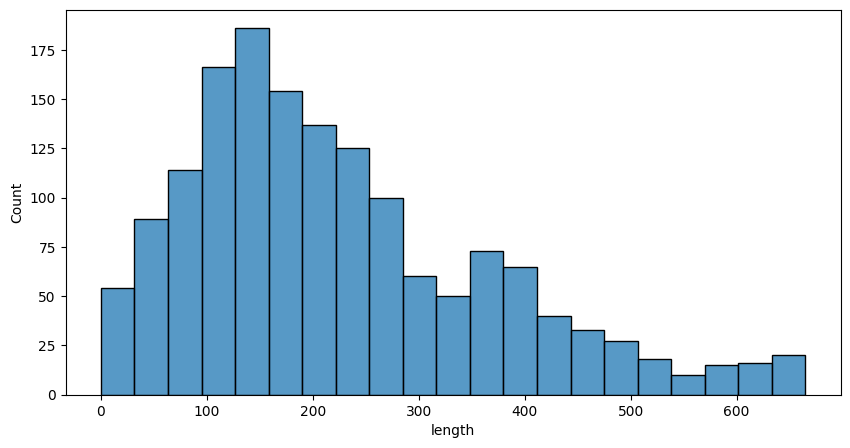

In [75]:
plt.figure(figsize = (10,5))
sns.histplot(bl['length'])

<Axes: xlabel='type', ylabel='length'>

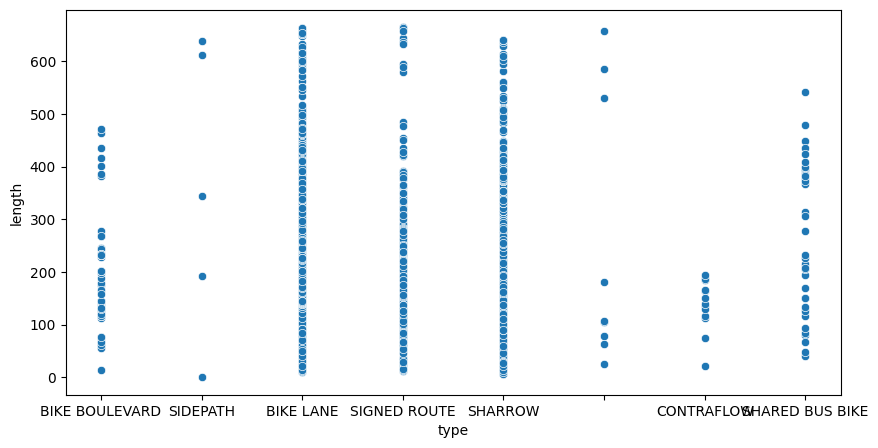

In [76]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = bl['type'],y = bl['length'])

<Axes: xlabel='type', ylabel='length'>

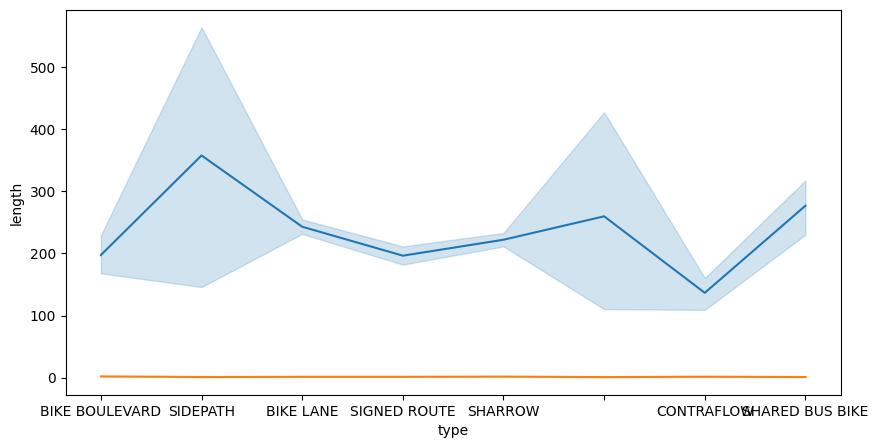

In [80]:
plt.figure(figsize = (10,5))
sns.lineplot(x = bl['type'],y = bl['length'])
sns.lineplot(x = bl['type'],y = bl['lanes'])

<ipython-input-81-cfbcb5700029>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = bl.corr()


<Axes: >

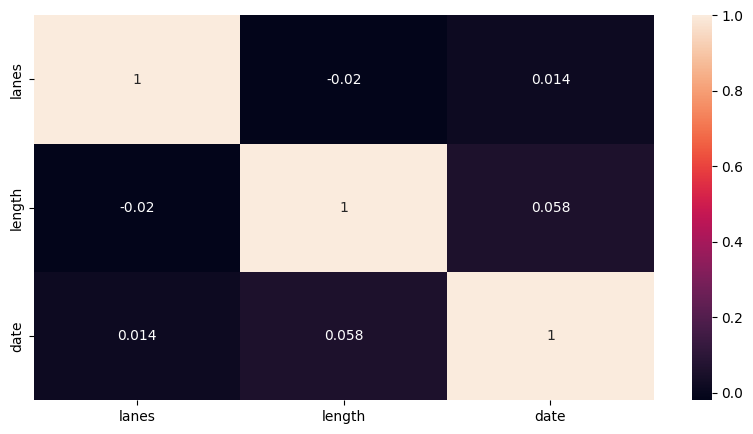

In [81]:
plt.figure(figsize = (10,5))
c = bl.corr()
sns.heatmap(c,annot = True)